In [26]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload

BASE_DIR = os.path.abspath("../")
if BASE_DIR not in sys.path:
    sys.path.append(BASE_DIR)

from src import config, utils, image, clustering, main

custom_modules = [module for name, module in sys.modules.items() if name.startswith('src.')]

for custom_module in custom_modules:
    reload(custom_module)

In [22]:
main.select_territory_from_modis_data()

In [23]:
unique = main.get_unique_classes_from_modis_selected_data()
unique, len(unique)

(array([ 0,  2,  3,  8, 11, 12], dtype=uint16), 6)

In [27]:
main.get_kmeans_10_clusters_stats()
stats = pd.read_csv(config.selected_n_clusters_stats_path, index_col=False)
stats

,modis_point_x,modis_point_y,modis_class,coordinate_x,coordinate_y,sentinel_class_0_count,sentinel_class_1_count,sentinel_class_2_count,sentinel_class_3_count,sentinel_class_4_count,...,sentinel_class_21_count,sentinel_class_22_count,sentinel_class_23_count,sentinel_class_24_count,sentinel_class_25_count,sentinel_class_26_count,sentinel_class_27_count,sentinel_class_28_count,sentinel_class_29_count,sentinel_majority_class
0,20,1,3,405443.965899,6.299807e+06,4,8,44,20,0,...,17,0,6,19,0,0,0,2,13,16
1,16,2,3,404343.060770,6.299532e+06,0,251,0,15,25,...,116,0,2,1,19,0,0,0,26,1
2,17,2,3,404618.287052,6.299532e+06,7,19,0,13,1,...,3,0,0,20,0,0,0,0,286,29
3,21,2,3,405719.192181,6.299532e+06,5,0,53,0,0,...,0,0,0,284,0,5,0,0,6,24
4,32,2,3,408746.681286,6.299532e+06,110,0,205,0,0,...,0,5,0,115,1,0,0,0,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,41,70,11,411223.717826,6.280816e+06,44,0,16,0,0,...,0,151,0,9,0,233,0,0,0,26
304,42,70,11,411498.944108,6.280816e+06,5,0,46,0,0,...,0,342,0,6,0,268,0,0,0,22
305,1,71,12,400214.666536,6.280541e+06,13,0,16,0,0,...,0,110,0,35,0,239,0,0,0,5
306,24,71,12,406544.871028,6.280541e+06,10,0,0,0,0,...,0,20,0,304,0,121,0,0,5,24


Лиственный лес, modis -> sentinel: 3 -> 13
	sentinel class: 0, count: 7
	sentinel class: 1, count: 1
	sentinel class: 2, count: 9
	sentinel class: 5, count: 4
	sentinel class: 9, count: 3
	sentinel class: 13, count: 11
	sentinel class: 15, count: 1
	sentinel class: 16, count: 2
	sentinel class: 17, count: 2
	sentinel class: 19, count: 6
	sentinel class: 22, count: 1
	sentinel class: 24, count: 7
	sentinel class: 25, count: 2
	sentinel class: 26, count: 2
	sentinel class: 29, count: 8


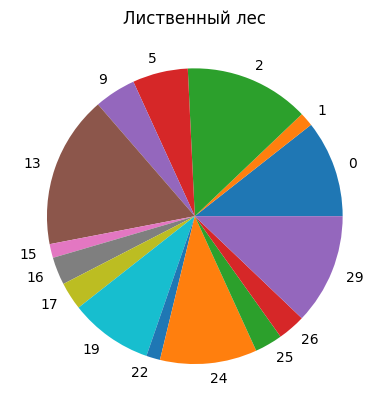

Луга, modis -> sentinel: 8 -> 10
	sentinel class: 1, count: 3
	sentinel class: 4, count: 1
	sentinel class: 10, count: 5
	sentinel class: 14, count: 2
	sentinel class: 23, count: 5


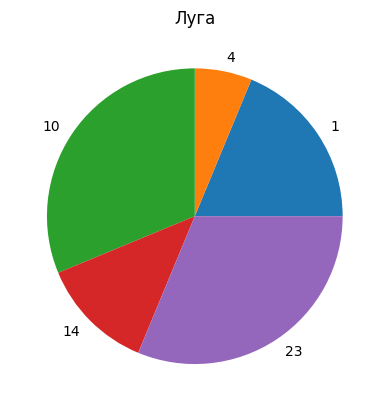

Смешанный лес, modis -> sentinel: 11 -> 26
	sentinel class: 22, count: 2
	sentinel class: 26, count: 3


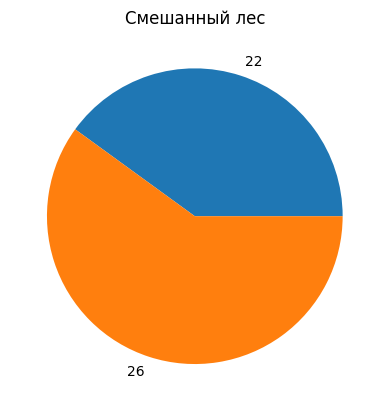

Смешанный лес с преобладанием лиственных, modis -> sentinel: 12 -> 24
	sentinel class: 0, count: 12
	sentinel class: 2, count: 2
	sentinel class: 5, count: 36
	sentinel class: 13, count: 5
	sentinel class: 16, count: 9
	sentinel class: 19, count: 25
	sentinel class: 22, count: 12
	sentinel class: 24, count: 61
	sentinel class: 26, count: 58
	sentinel class: 29, count: 1


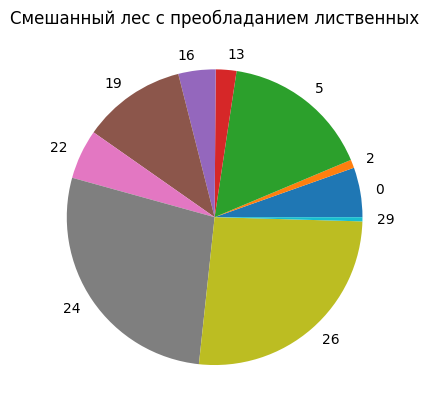

In [28]:
modis_classes = np.unique(stats["modis_class"])

for modis_class in modis_classes:
    unique, counts = np.unique(
        stats[stats["modis_class"] == modis_class]["sentinel_majority_class"],
        return_counts=True,
    )
    print(
        f"{utils.get_class_name_by_index(modis_class)}, modis -> sentinel: {modis_class} -> {unique[counts.argmax()]}"
    )
    for i in range(len(unique)):
        print(f"\tsentinel class: {unique[i]}, count: {counts[i]}")
    plt.pie(counts, labels=list(unique))
    plt.title(utils.get_class_name_by_index(modis_class))
    plt.show()

Темнохвойный лес, modis -> sentinel: 1 -> 3
	sentinel class: 1, count: 6
	sentinel class: 2, count: 19
	sentinel class: 3, count: 119
	sentinel class: 5, count: 10
	sentinel class: 9, count: 5


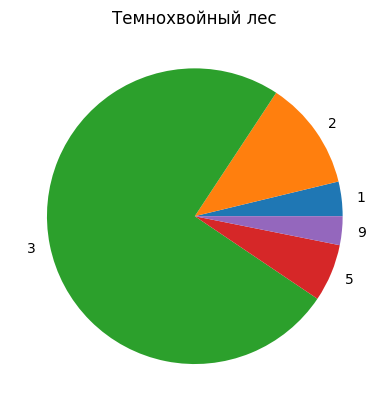

Светлохвойный лес, modis -> sentinel: 2 -> 2
	sentinel class: 1, count: 6
	sentinel class: 2, count: 516
	sentinel class: 3, count: 27
	sentinel class: 4, count: 20
	sentinel class: 5, count: 81
	sentinel class: 6, count: 1
	sentinel class: 8, count: 1
	sentinel class: 9, count: 18


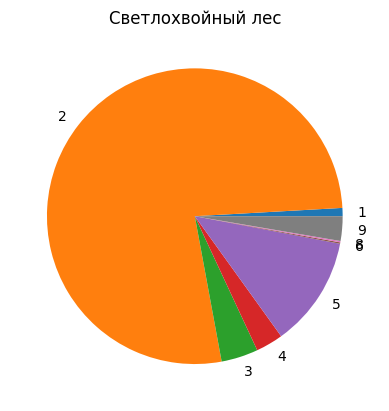

Лиственный лес, modis -> sentinel: 3 -> 2
	sentinel class: 0, count: 9
	sentinel class: 1, count: 35
	sentinel class: 2, count: 1117
	sentinel class: 3, count: 473
	sentinel class: 4, count: 37
	sentinel class: 5, count: 502
	sentinel class: 6, count: 7
	sentinel class: 7, count: 44
	sentinel class: 8, count: 5
	sentinel class: 9, count: 42


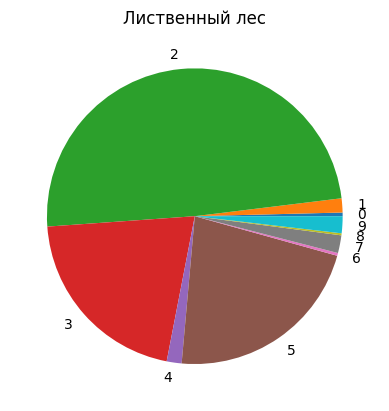

Луга, modis -> sentinel: 8 -> 7
	sentinel class: 0, count: 4
	sentinel class: 1, count: 599
	sentinel class: 2, count: 116
	sentinel class: 3, count: 24
	sentinel class: 4, count: 779
	sentinel class: 5, count: 423
	sentinel class: 6, count: 52
	sentinel class: 7, count: 940
	sentinel class: 8, count: 141
	sentinel class: 9, count: 275


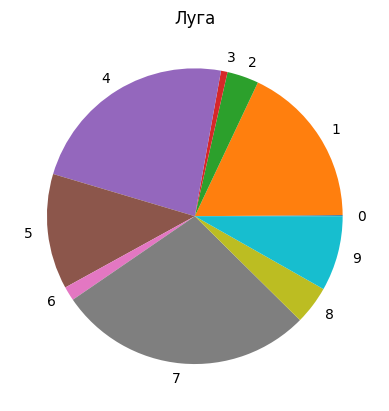

Смешанный лес с преобладанием хвойных, modis -> sentinel: 10 -> 3
	sentinel class: 1, count: 4
	sentinel class: 2, count: 3
	sentinel class: 3, count: 38
	sentinel class: 9, count: 4


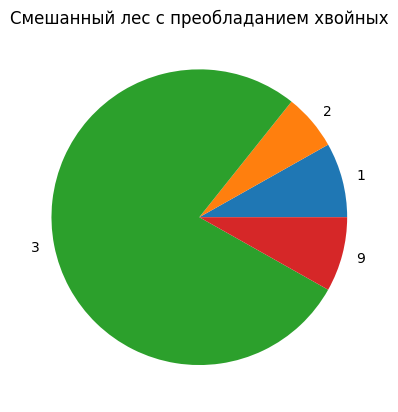

Смешанный лес, modis -> sentinel: 11 -> 2
	sentinel class: 1, count: 3
	sentinel class: 2, count: 81
	sentinel class: 3, count: 65


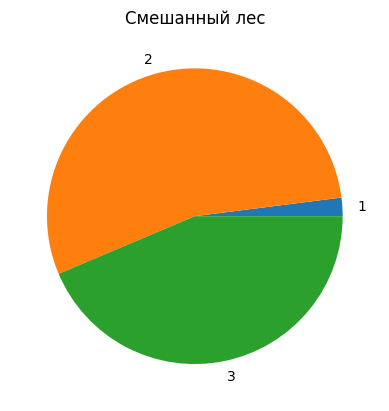

Смешанный лес с преобладанием лиственных, modis -> sentinel: 12 -> 2
	sentinel class: 0, count: 1
	sentinel class: 1, count: 5
	sentinel class: 2, count: 748
	sentinel class: 3, count: 123
	sentinel class: 5, count: 33
	sentinel class: 9, count: 4


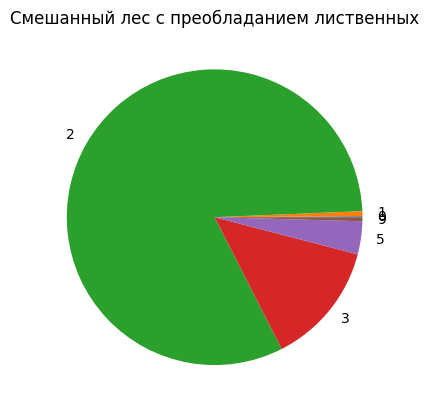

In [14]:
modis_classes = np.unique(stats["modis_class"])

for modis_class in modis_classes:
    unique, counts = np.unique(
        stats[stats["modis_class"] == modis_class]["sentinel_majority_class"],
        return_counts=True,
    )
    print(
        f"{utils.get_class_name_by_index(modis_class)}, modis -> sentinel: {modis_class} -> {unique[counts.argmax()]}"
    )
    for i in range(len(unique)):
        print(f"\tsentinel class: {unique[i]}, count: {counts[i]}")
    plt.pie(counts, labels=list(unique))
    plt.title(utils.get_class_name_by_index(modis_class))
    plt.show()

In [16]:
main.get_kmeans_10_clusters_stats()
stats = pd.read_csv(config.selected_n_clusters_stats_path, index_col=False)
stats

,modis_point_x,modis_point_y,modis_class,coordinate_x,coordinate_y,sentinel_class_0_count,sentinel_class_1_count,sentinel_class_2_count,sentinel_class_3_count,sentinel_class_4_count,...,sentinel_class_11_count,sentinel_class_12_count,sentinel_class_13_count,sentinel_class_14_count,sentinel_class_15_count,sentinel_class_16_count,sentinel_class_17_count,sentinel_class_18_count,sentinel_class_19_count,sentinel_majority_class
0,20,1,3,405443.965899,6.299807e+06,28,6,16,3,10,...,1,0,20,119,0,23,30,497,0,18
1,116,1,12,431865.688995,6.299807e+06,0,491,0,4,0,...,0,0,150,0,0,0,0,0,0,1
2,118,1,12,432416.141560,6.299807e+06,0,387,0,3,0,...,0,0,62,1,0,3,0,0,0,1
3,126,1,12,434617.951818,6.299807e+06,0,309,0,12,0,...,0,0,151,0,0,0,0,0,0,1
4,153,1,3,442049.061439,6.299807e+06,4,27,46,0,117,...,0,41,5,0,0,2,6,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7560,184,398,8,450581.076189,6.190542e+06,37,29,17,0,158,...,4,53,4,73,4,116,10,16,0,4
7561,207,398,8,456911.280681,6.190542e+06,15,5,1,18,145,...,0,27,4,192,2,172,2,46,0,14
7562,250,398,8,468746.010818,6.190542e+06,45,1,19,1,111,...,1,41,1,153,3,155,1,66,0,16
7563,251,398,8,469021.237100,6.190542e+06,44,16,15,0,259,...,0,109,4,28,24,113,2,8,0,4


Темнохвойный лес, modis -> sentinel: 1 -> 13
	sentinel class: 0, count: 1
	sentinel class: 1, count: 14
	sentinel class: 3, count: 11
	sentinel class: 6, count: 1
	sentinel class: 8, count: 1
	sentinel class: 13, count: 108
	sentinel class: 14, count: 18
	sentinel class: 16, count: 4
	sentinel class: 18, count: 1


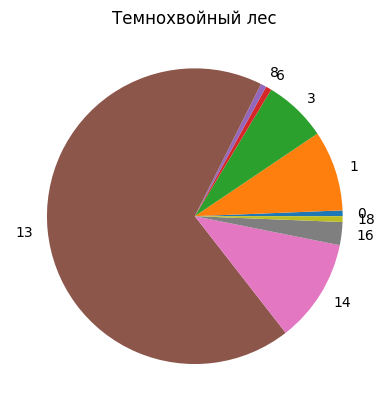

Светлохвойный лес, modis -> sentinel: 2 -> 1
	sentinel class: 1, count: 322
	sentinel class: 3, count: 4
	sentinel class: 4, count: 23
	sentinel class: 5, count: 1
	sentinel class: 6, count: 1
	sentinel class: 8, count: 43
	sentinel class: 10, count: 213
	sentinel class: 11, count: 1
	sentinel class: 12, count: 2
	sentinel class: 13, count: 10
	sentinel class: 14, count: 28
	sentinel class: 16, count: 8
	sentinel class: 18, count: 14


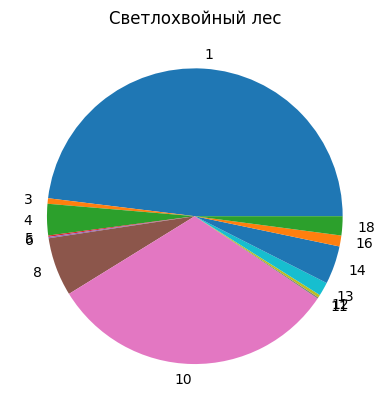

Лиственный лес, modis -> sentinel: 3 -> 10
	sentinel class: 0, count: 35
	sentinel class: 1, count: 608
	sentinel class: 2, count: 23
	sentinel class: 3, count: 174
	sentinel class: 4, count: 18
	sentinel class: 5, count: 7
	sentinel class: 6, count: 2
	sentinel class: 8, count: 234
	sentinel class: 9, count: 5
	sentinel class: 10, count: 641
	sentinel class: 11, count: 5
	sentinel class: 12, count: 10
	sentinel class: 13, count: 284
	sentinel class: 14, count: 86
	sentinel class: 16, count: 43
	sentinel class: 17, count: 25
	sentinel class: 18, count: 71


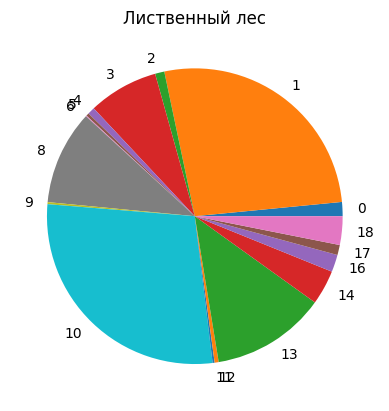

Луга, modis -> sentinel: 8 -> 0
	sentinel class: 0, count: 646
	sentinel class: 1, count: 28
	sentinel class: 2, count: 201
	sentinel class: 3, count: 7
	sentinel class: 4, count: 473
	sentinel class: 5, count: 34
	sentinel class: 6, count: 128
	sentinel class: 8, count: 127
	sentinel class: 9, count: 9
	sentinel class: 10, count: 126
	sentinel class: 11, count: 30
	sentinel class: 12, count: 172
	sentinel class: 13, count: 5
	sentinel class: 14, count: 288
	sentinel class: 15, count: 28
	sentinel class: 16, count: 443
	sentinel class: 17, count: 539
	sentinel class: 18, count: 69


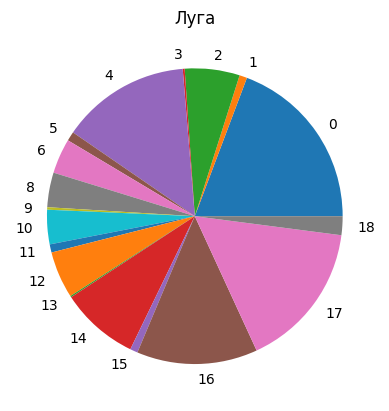

Смешанный лес с преобладанием хвойных, modis -> sentinel: 10 -> 13
	sentinel class: 0, count: 2
	sentinel class: 1, count: 2
	sentinel class: 3, count: 3
	sentinel class: 6, count: 2
	sentinel class: 10, count: 1
	sentinel class: 13, count: 34
	sentinel class: 14, count: 1
	sentinel class: 16, count: 4


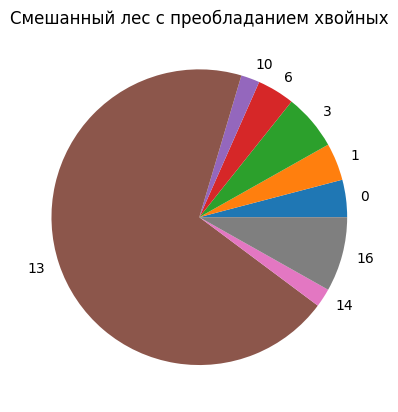

Смешанный лес, modis -> sentinel: 11 -> 1
	sentinel class: 1, count: 78
	sentinel class: 3, count: 1
	sentinel class: 13, count: 67
	sentinel class: 16, count: 3


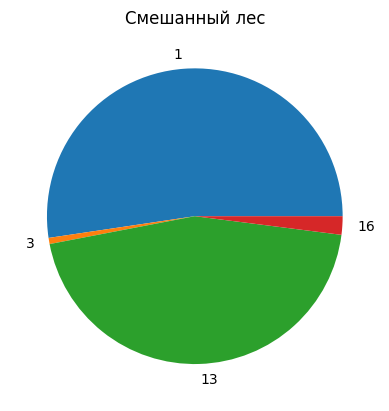

Смешанный лес с преобладанием лиственных, modis -> sentinel: 12 -> 1
	sentinel class: 0, count: 1
	sentinel class: 1, count: 547
	sentinel class: 3, count: 1
	sentinel class: 8, count: 9
	sentinel class: 9, count: 1
	sentinel class: 10, count: 202
	sentinel class: 11, count: 1
	sentinel class: 13, count: 137
	sentinel class: 14, count: 9
	sentinel class: 16, count: 5
	sentinel class: 18, count: 1


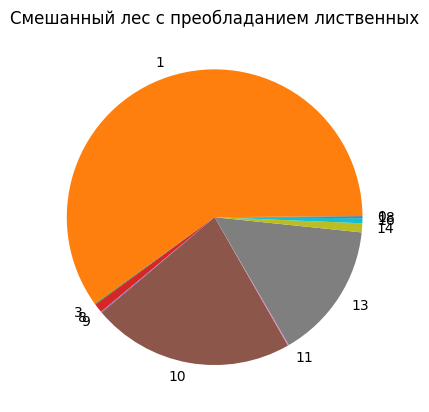

In [17]:
modis_classes = np.unique(stats["modis_class"])

for modis_class in modis_classes:
    unique, counts = np.unique(
        stats[stats["modis_class"] == modis_class]["sentinel_majority_class"],
        return_counts=True,
    )
    print(
        f"{utils.get_class_name_by_index(modis_class)}, modis -> sentinel: {modis_class} -> {unique[counts.argmax()]}"
    )
    for i in range(len(unique)):
        print(f"\tsentinel class: {unique[i]}, count: {counts[i]}")
    plt.pie(counts, labels=list(unique))
    plt.title(utils.get_class_name_by_index(modis_class))
    plt.show()